# Simulation

This notebook simulates one year of data at Cork Airport, Ireland. About fifty years of historical weather data from hundreds of weather stations around Ireland is available from the Met Eireann website [1]. To perform this simulation, a subset of the data available from Cork Airport is used to identify the features of a few of the variables from that data.

In [115]:
# imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Read csv to dataframe
df = pd.read_csv('data/source/dly3904.csv', header=21)
# subset the columns of interest
df = df[['date', 'maxtp', 'mintp', 'rain', 'sun']]
# cast date column as date type
df['date'] = pd.to_datetime(df['date'])
# subset to one year of data
one_year = (df['date'] >= '2020-12-1') & (df['date'] <= '2021-11-30')
df = df.loc[one_year]
# Set date as index
df.set_index('date', inplace=True)
# cast sun and ran as floats
df = df.astype({'rain': 'float64', 'sun': 'float64'})

In [117]:
df['month'] = pd.DatetimeIndex(df.index).month

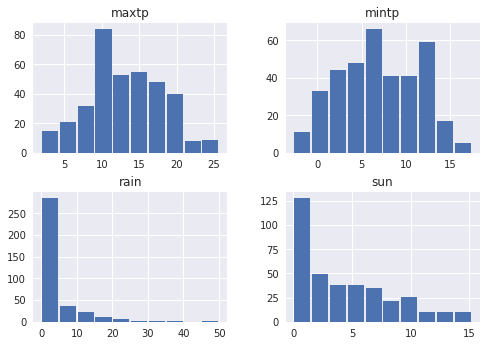

In [118]:
# Look at some histograms
with plt.style.context('seaborn'):
    df.drop('month', axis=1).hist(rwidth=0.9)

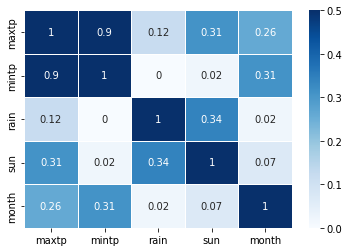

In [121]:
corr = df.corr()
sns.heatmap(abs(corr.round(2)), annot=True, linewidths=0.5, cmap='Blues', vmax=0.5)
plt.show()

### References

[1] Met Eireann &mdash; Irish Meteorological Service, Historical Data [online]. Available from https://www.met.ie/climate/available-data/historical-data

